In [4]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("LungCapData2.csv")
data.head()

,Age,LungCap,Height,Gender,Smoke
0,9,3.124,57.0,female,no
1,8,3.172,67.5,female,no
2,7,3.160,54.5,female,no
3,9,2.674,53.0,male,no
4,9,3.685,57.0,male,no


In [5]:
data.groupby("Gender")["LungCap"].mean()

Gender
female    5.353509
male      6.437339
Name: LungCap, dtype: float64

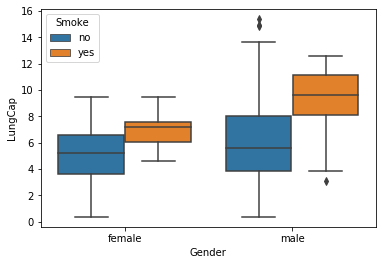

In [28]:
sns.boxplot(x="Gender", y="LungCap", data=data, hue="Smoke")

In [7]:
data.groupby("Smoke")["LungCap"].mean()

Smoke
no     5.698428
yes    7.830585
Name: LungCap, dtype: float64

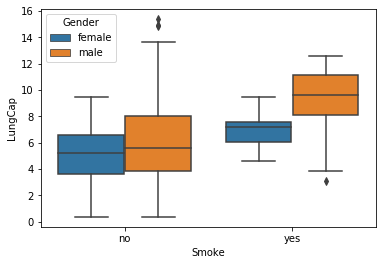

In [29]:
sns.boxplot(x="Smoke", y="LungCap", data=data, hue="Gender")

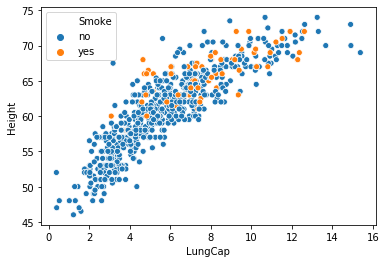

In [11]:
sns.scatterplot(x="LungCap", y="Height", data=data, hue="Smoke")

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

h1=data.Height
h2=data.Height**2
h3=data.Height**3

### ANOVA Over Model 1

In [16]:
model1=ols('LungCap~h1', data=data).fit()
table1 =sm.stats.anova_lm(model1)
print(table1)

             df       sum_sq      mean_sq            F         PR(>F)
h1          1.0  3329.872698  3329.872698  1994.731141  1.574556e-200
Residual  652.0  1088.405828     1.669334          NaN            NaN


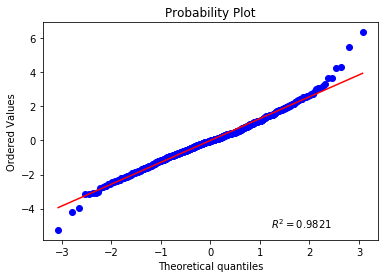

In [17]:
normality_plot, stat=stats.probplot(model1.resid,plot=plt,rvalue=True)

<h3> ANOVA Over Model 2 </h3>

In [23]:
model2=ols('LungCap~h1+h2', data=data).fit()
table2 =sm.stats.anova_lm(model2)
print(table2)

             df       sum_sq      mean_sq            F         PR(>F)
h1          1.0  3329.872698  3329.872698  2171.890385  1.483959e-209
h2          1.0    90.313502    90.313502    58.906464   6.068515e-14
Residual  651.0   998.092326     1.533168          NaN            NaN


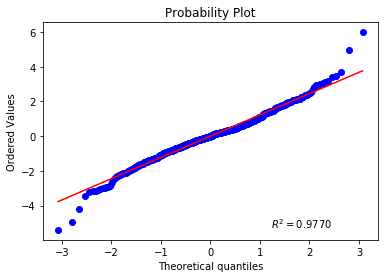

In [24]:
normality_plot, stat=stats.probplot(model2.resid,plot=plt,rvalue=True)

<h3> ANOVA Over Model 3 </h3>

In [25]:
model3=ols('LungCap~h1+h2+h3', data=data).fit()
table3 =sm.stats.anova_lm(model3)
print(table3)

             df       sum_sq      mean_sq            F         PR(>F)
h1          1.0  3329.872698  3329.872698  2169.207583  2.867993e-209
h2          1.0    90.313502    90.313502    58.833700   6.289682e-14
h3          1.0     0.300658     0.300658     0.195860   6.582306e-01
Residual  650.0   997.791669     1.535064          NaN            NaN


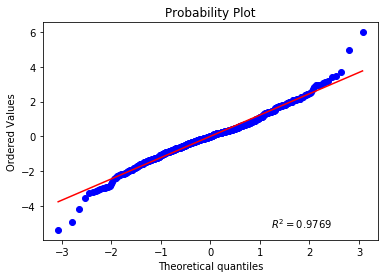

In [26]:
normality_plot, stat=stats.probplot(model3.resid,plot=plt,rvalue=True)